# Wprowadzenie

Skrypt pokazuje jak użyć pakietu SciKit do wizualizacji danych na przykładzie zestawu danych zawierającego obrazy cyfr pisanych ręcznie.

In [72]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import (datasets, decomposition, ensemble, manifold, neighbors, random_projection)

In [2]:
def plot_digits(X, y):
    X = (X - np.min(X, 0)) / (np.max(X, 0) - np.min(X, 0))

    plt.figure(figsize=(12, 9))

    for i in xrange(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(0.1*y[i]), fontdict={'weight':'bold', 'size':8})

    plt.xticks([])
    plt.yticks([])
    plt.show()

In [101]:
def analyze_raw_knn(list_of_k, data, target):
    errors = [0 for _ in range(len(list_of_k))]
    k_cross = 5
    merged_data = np.hstack([data, np.array([target]).T])[:-2, :]
    np.random.shuffle(merged_data)
    merged_data = merged_data.reshape((k_cross, merged_data.shape[0]/k_cross, merged_data.shape[1]))
    knn = neighbors.NearestNeighbors()
    for i in range(k_cross):
        mask = np.array(range(k_cross)) != i
        test_set, training_set = merged_data[i], merged_data[mask].reshape(((k_cross-1)*merged_data.shape[1], merged_data.shape[2]))
        training_labels, test_labels = training_set[:, -1], test_set[:, -1]
        reduced_training_set = training_set[:, :-1]
        knn.fit(reduced_training_set)
        reduced_test_set = test_set[:, :-1]
        for k in list_of_k:
            for (test_data, test_label) in zip(reduced_test_set, test_labels):
                label = stats.mode(training_set[knn.kneighbors(np.array([test_data]), k, return_distance=False)[0], -1])[0][0]
                if label != test_label:
                    errors[k/2] += 1
    errors_percentages = [(i*2+1, e*100.0/(k_cross*test_set.shape[0])) for i, e in enumerate(errors)]

    plt.plot([k for (k, _) in errors_percentages], [error_rate for (_, error_rate) in errors_percentages], marker='x')

def analyze_knn(list_of_k, method_object, data, target):
    errors = [0 for _ in range(len(list_of_k))]
    k_cross = 5
    merged_data = np.hstack([data, np.array([target]).T])[:-2, :]
    np.random.shuffle(merged_data)
    merged_data = merged_data.reshape((k_cross, merged_data.shape[0]/k_cross, merged_data.shape[1]))
    knn = neighbors.NearestNeighbors()
    for i in range(k_cross):
        mask = np.array(range(k_cross)) != i
        test_set, training_set = merged_data[i], merged_data[mask].reshape(((k_cross-1)*merged_data.shape[1], merged_data.shape[2]))
        training_labels, test_labels = training_set[:, -1], test_set[:, -1]
        method_object.fit(training_set[:, :-1])
        reduced_training_set = method_object.transform(training_set[:, :-1])
        knn.fit(reduced_training_set)
        reduced_test_set = method_object.transform(test_set[:, :-1])
        for k in list_of_k:
            for (test_data, test_label) in zip(reduced_test_set, test_labels):
                label = stats.mode(training_set[knn.kneighbors(np.array([test_data]), k, return_distance=False)[0], -1])[0][0]
                if label != test_label:
                    errors[k/2] += 1
    errors_percentages = [(i*2+1, e*100.0/(k_cross*test_set.shape[0])) for i, e in enumerate(errors)]

    plt.plot([k for (k, _) in errors_percentages], [error_rate for (_, error_rate) in errors_percentages], marker='x')

# Wczytanie danych

In [20]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
N, d = X.shape

# Wyświetlenie przykładowych cyfr

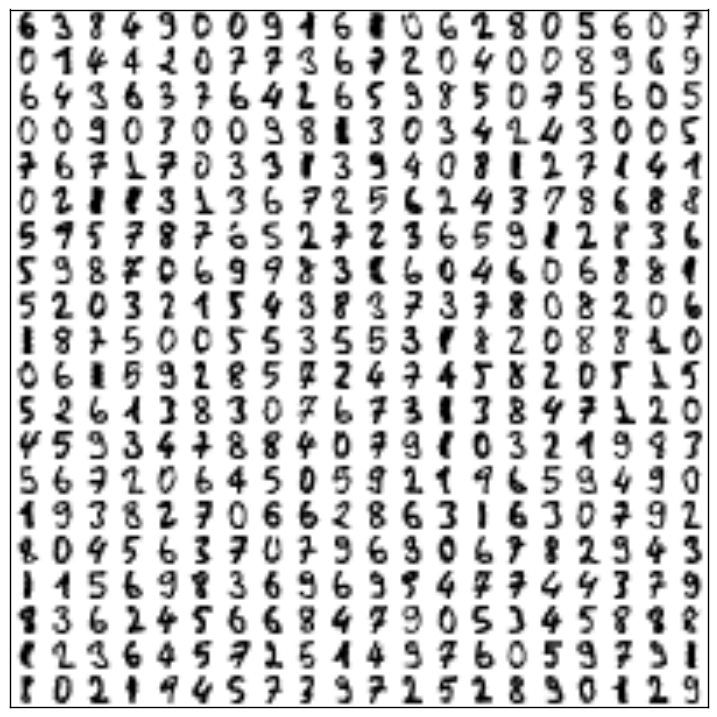

In [5]:
M = 20
image = np.zeros((10 * M, 10 * M))
order = np.random.permutation(N)
for i in xrange(M):
    for j in range(M):
        image[10*i+1:10*i+9, 10*j+1:10*j+9] = X[order[i*M+j], :].reshape((8, 8))

plt.figure(figsize=(9, 9))
plt.imshow(image, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

# Rzut na dwie losowo wybrane osie

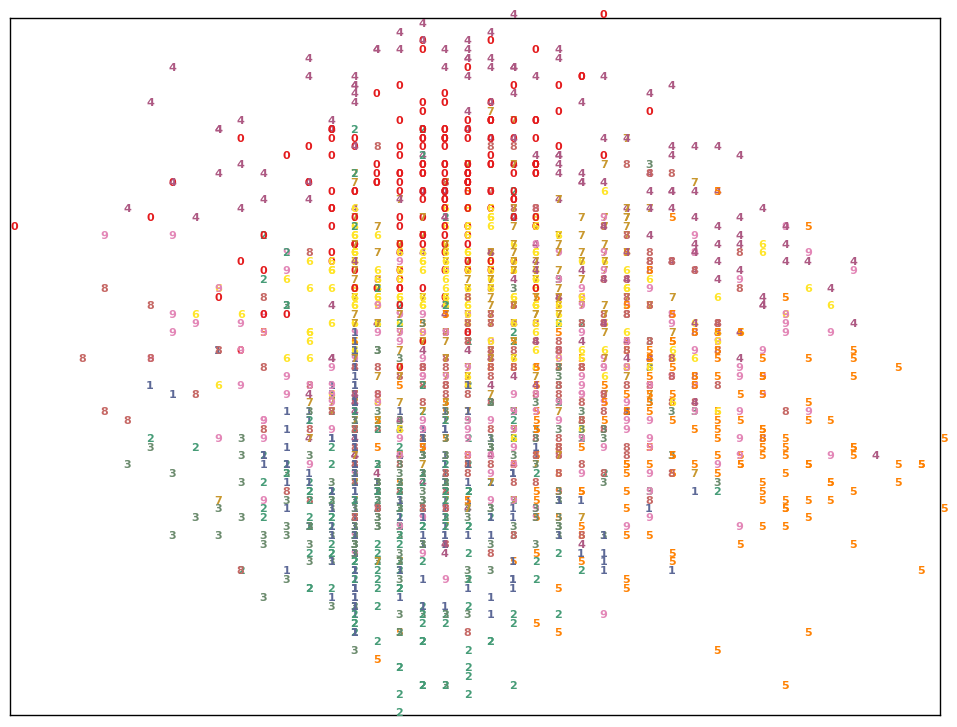

In [8]:
X_projected = random_projection.SparseRandomProjection(n_components=2).fit_transform(X)
plot_digits(X_projected, digits.target)

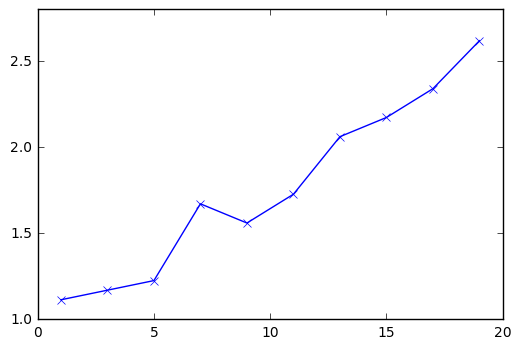

In [102]:
analyze_raw_knn(range(1, 20, 2), X, y)

# Principal Component Analysis (PCA)

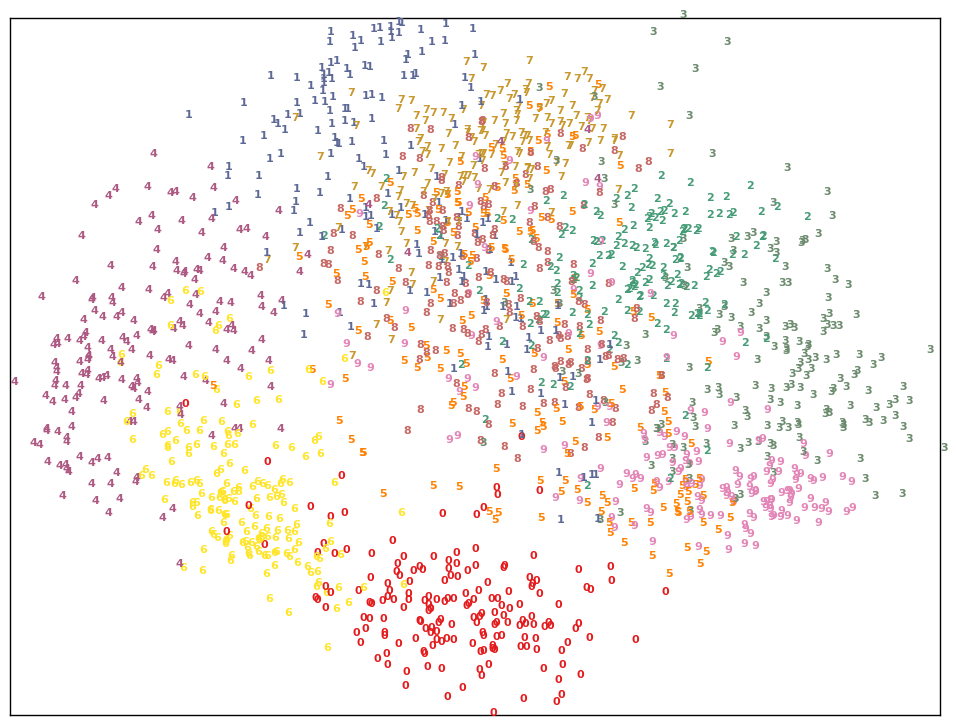

In [87]:
X_pca = decomposition.PCA(n_components=2).fit_transform(X)
plot_digits(X_pca, digits.target)

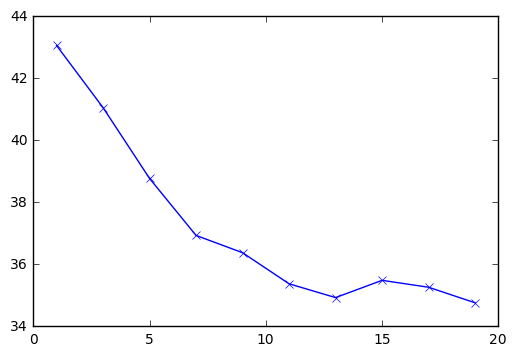

In [88]:
X_pca = decomposition.PCA(n_components=2)
analyze_knn(range(1, 20, 2), X_pca, X, y)

# Kernel Principal Component Analysis (KPCA)

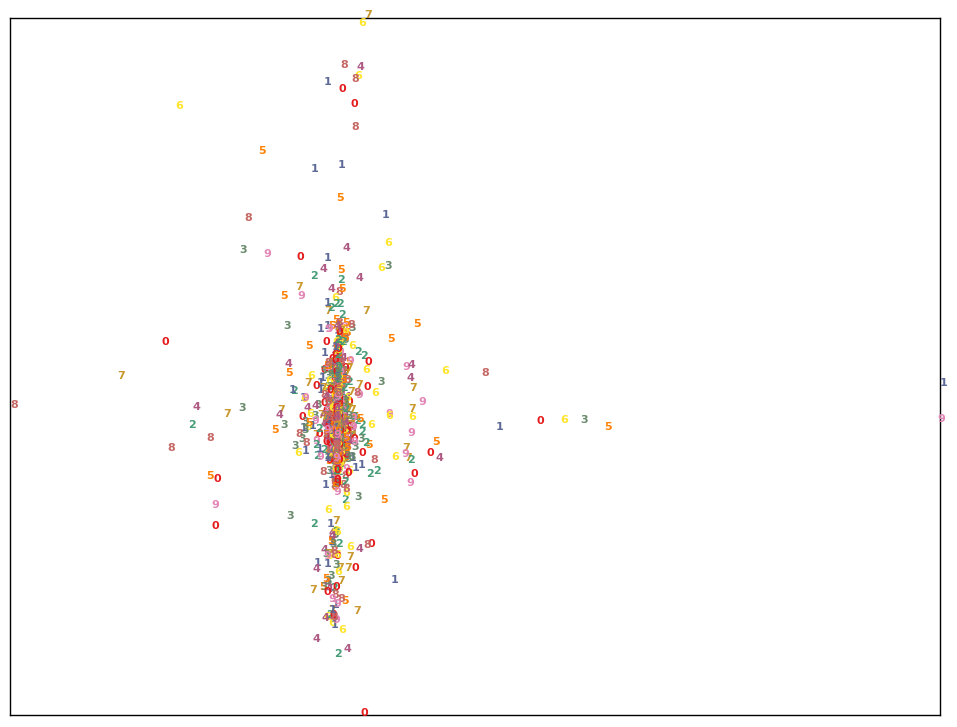

In [89]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=10).fit_transform(X)
plot_digits(X_kpca, digits.target)

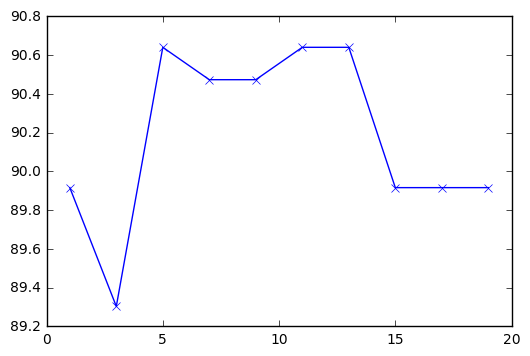

In [91]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=10)
analyze_knn(range(1, 20, 2), X_kpca, X, y)

# Isomap

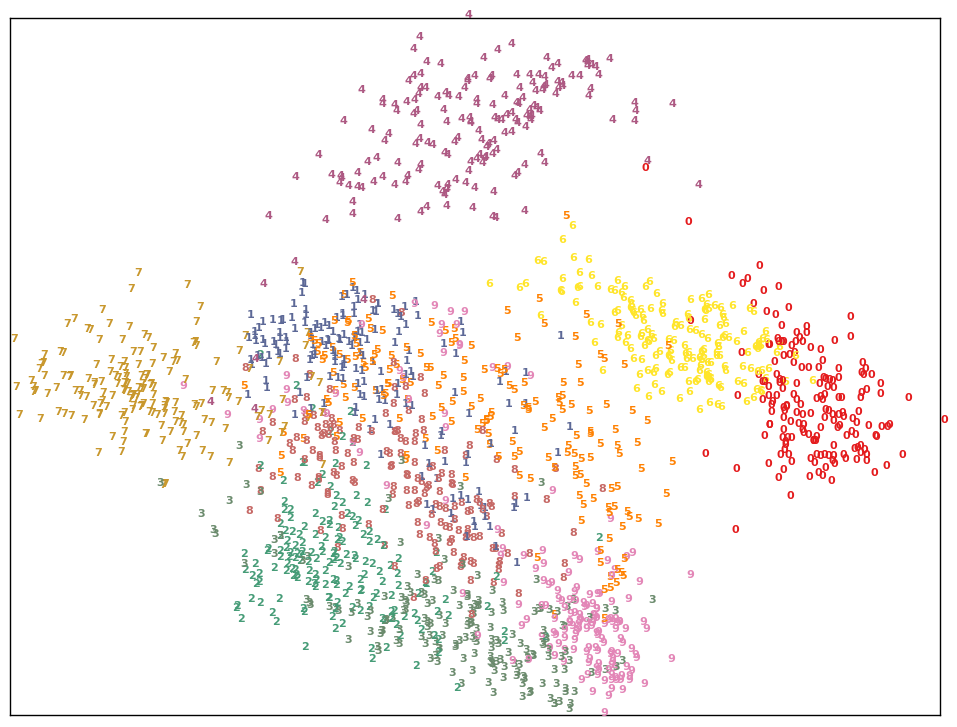

In [92]:
X_iso = manifold.Isomap(30, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

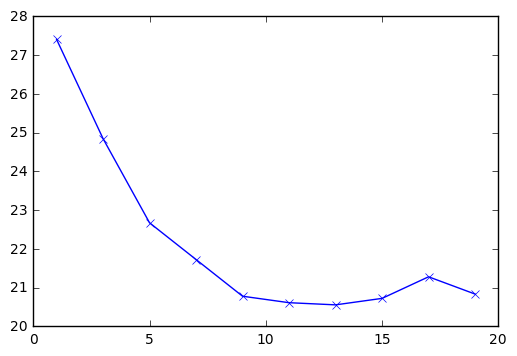

In [93]:
X_iso = manifold.Isomap(30, n_components=2)
analyze_knn(range(1, 20, 2), X_iso, X, y)

# Locally Linear Embedding (LLE)

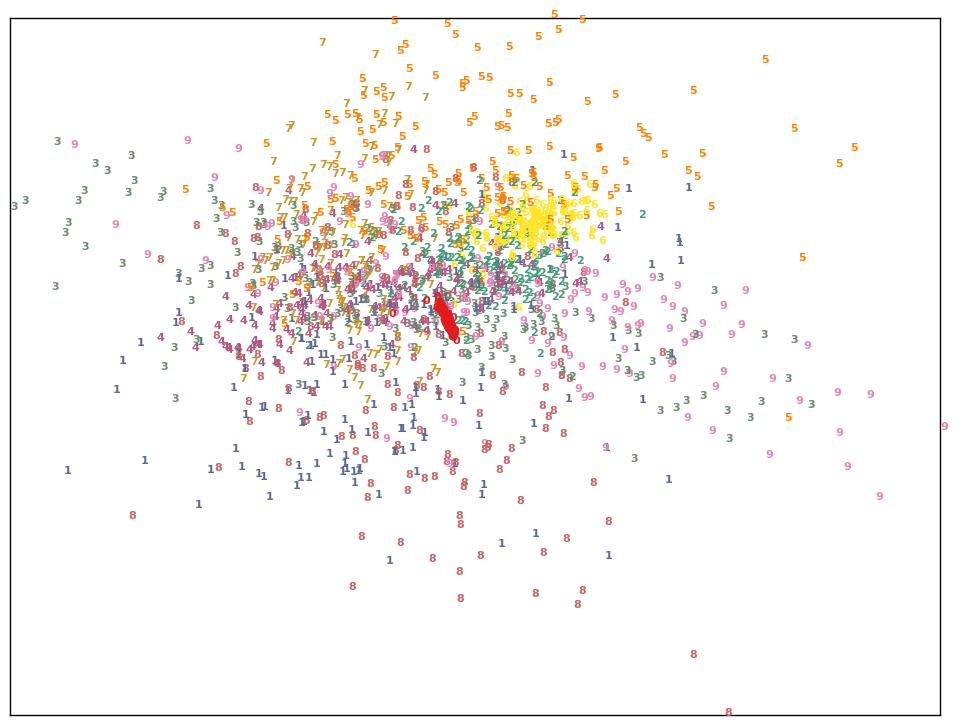

In [11]:
X_lle = manifold.LocallyLinearEmbedding(30, n_components=2).fit_transform(X)
plot_digits(X_lle, digits.target)

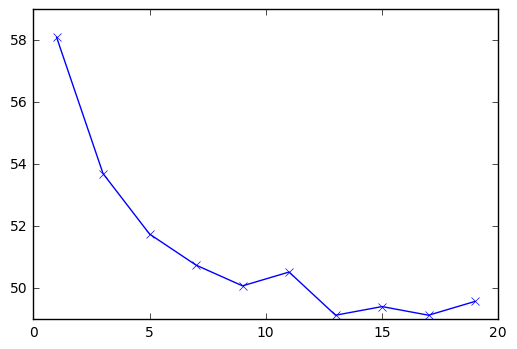

In [96]:
X_lle = manifold.LocallyLinearEmbedding(30, n_components=2)
analyze_knn(range(1, 20, 2), X_lle, X, y)

# Multidimensional Scaling (MDS)

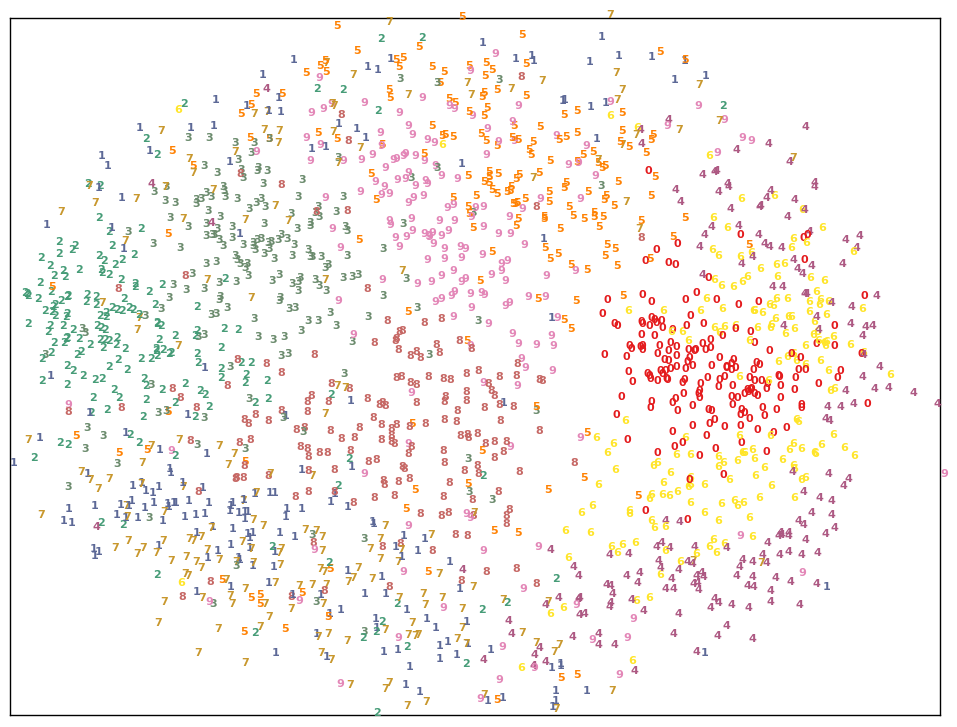

In [12]:
X_mds = manifold.MDS(n_components=2, n_init=1, max_iter=100).fit_transform(X)
plot_digits(X_mds, digits.target)

In [97]:
X_mds = manifold.MDS(n_components=2, n_init=1, max_iter=100)
analyze_knn(range(1, 20, 2), X_mds, X, y)

AttributeError: 'MDS' object has no attribute 'transform'

# t-distributed Stochastic Neighbor Embedding (t-SNE)

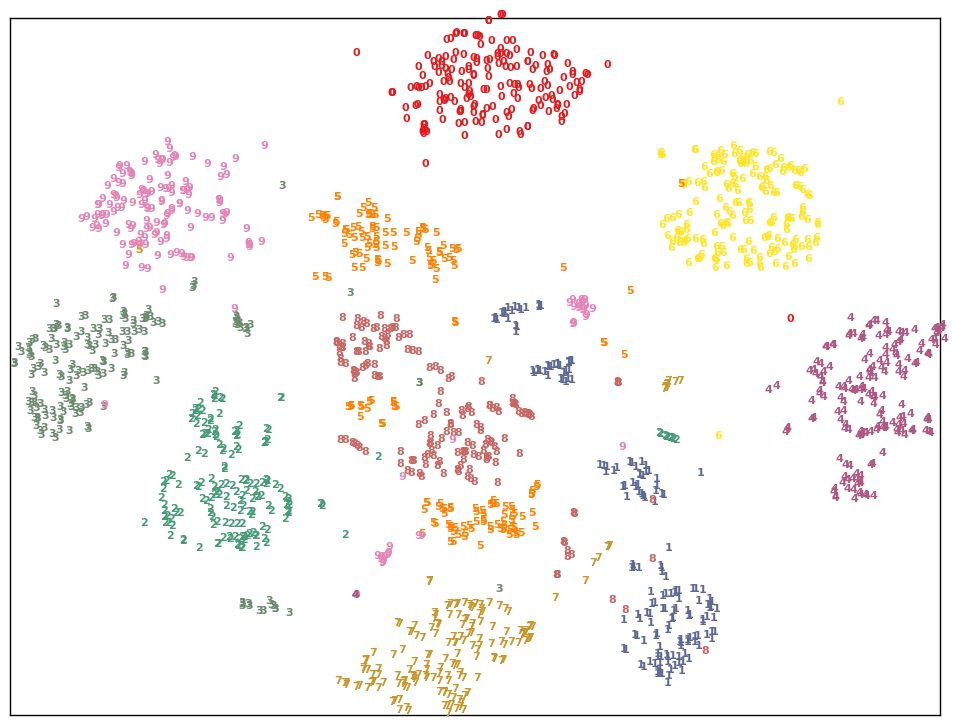

In [13]:
X_tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(X)
plot_digits(X_tsne, digits.target)

In [98]:
X_tsne = manifold.TSNE(n_components=2, init='pca')
analyze_knn(range(1, 20, 2), X_tsne, X, y)

AttributeError: 'TSNE' object has no attribute 'transform'